#**Genomic Distribution Figure**

In [ ]:
# import necessary libraries/packages and load in the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Genomic_Distribution.csv')
data

,Gains,Losses
0,19,X
1,9,2
2,9,16
3,10,6
4,12,9
...,...,...
195,15,X
196,Y,10
197,22,X
198,9,6


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Genomic_Distribution.csv')

# Create empty dictionaries for gains and losses
gains_dict = {}
losses_dict = {}

# Count the number of occurrences of each chromosome in the 'Gains' column
for chrom in sorted(data['Gains'].unique()):
    if chrom != 'X' and chrom != 'Y':
        count = data['Gains'].value_counts()[chrom]
        gains_dict[int(chrom)] = count

# Count the number of occurrences of each chromosome in the 'Losses' column
for chrom in sorted(data['Losses'].unique()):
    if chrom != 'X' and chrom != 'Y':
        count = data['Losses'].value_counts()[chrom]
        losses_dict[int(chrom)] = count

# Add the counts for X and Y chromosomes to the dictionaries
gains_dict['X'] = data['Gains'].value_counts()['X']
gains_dict['Y'] = data['Gains'].value_counts()['Y']
losses_dict['X'] = data['Losses'].value_counts()['X']
losses_dict['Y'] = data['Losses'].value_counts()['Y']

# Sort the dictionaries by the numerical value of the keys (ignoring X and Y)
gains_dict = dict(sorted(gains_dict.items(), key=lambda x: x[0] if isinstance(x[0], int) else float('inf')))
losses_dict = dict(sorted(losses_dict.items(), key=lambda x: x[0] if isinstance(x[0], int) else float('inf')))

# Print the dictionaries
print("Gains Dictionary:", gains_dict)
print("Losses Dictionary:", losses_dict)

Gains Dictionary: {1: 15, 2: 12, 3: 6, 4: 8, 5: 8, 6: 5, 7: 10, 8: 15, 9: 11, 10: 9, 11: 4, 12: 7, 13: 5, 14: 1, 15: 13, 16: 12, 17: 12, 18: 9, 19: 8, 20: 4, 21: 2, 22: 19, 'X': 3, 'Y': 2}
Losses Dictionary: {1: 23, 2: 14, 3: 3, 4: 9, 5: 12, 6: 7, 7: 14, 8: 4, 9: 8, 10: 11, 11: 1, 12: 5, 13: 3, 14: 7, 15: 11, 16: 18, 17: 7, 18: 5, 19: 2, 20: 2, 21: 4, 22: 10, 'X': 19, 'Y': 1}


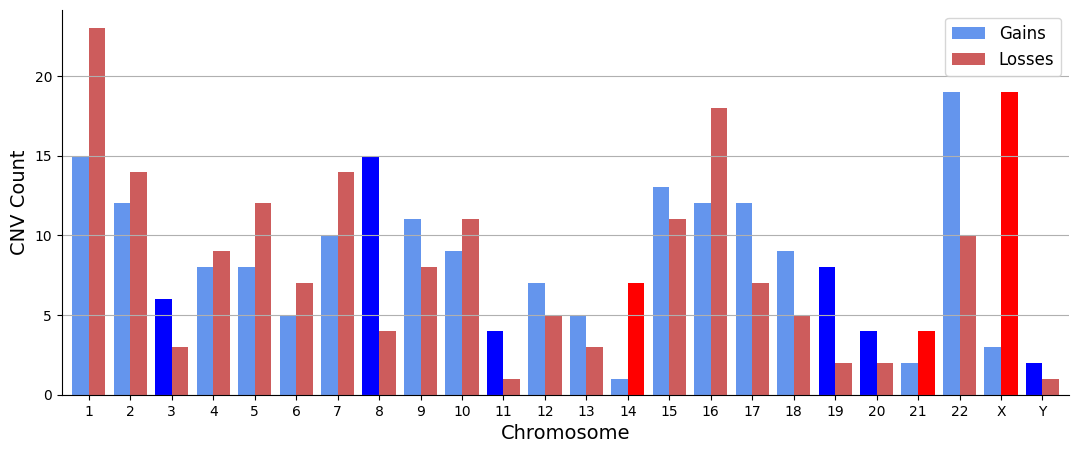

In [ ]:
# Create a pandas DataFrame for the chromosome counts
df = pd.DataFrame({'Gains': gains_dict, 'Losses': losses_dict})

# Define the color scheme
colors = {'Gains': 'CornflowerBlue', 'Losses': '#CD5C5C'}

# Set the figure size and column width
fig, ax = plt.subplots(figsize=(13, 5))
width = 0.8

# Plot the bar chart
df.plot.bar(rot=0, color=colors, width=width, ax=ax)

# Add legend and set font size
ax.legend(fontsize=12)

# Set the chart title and axis labels. Also add grid lines.
# ax.set_title('Distribution of Queried CNVs Across the Genome')
ax.set_xlabel('Chromosome', fontsize=14)
ax.set_ylabel('CNV Count', fontsize=14)
ax.grid(axis='y')

# Define a dictionary to store the patches and their corresponding chromosome names
patches = {}
# Iterate over the chromosomes and their counts
for i, (chrom, gains_count, losses_count) in enumerate(zip(df.index, df['Gains'], df['Losses'])):
    # Calculate the difference between gains and losses
    diff = abs(gains_count - losses_count)  
    if chrom not in ['X','Y'] and gains_count > losses_count and gains_count / losses_count >= 2:
      ax.patches[chrom-1].set_fc('blue')
    elif chrom not in ['X','Y'] and losses_count > gains_count and losses_count / gains_count >= 2:
      ax.patches[chrom-1+len(gains_dict)].set_fc('red') 
    # Manually set the colors for the X and Y chromosomes 
    elif chrom == 'X':
        # Store the patch and its corresponding chromosome name in the dictionary
        patches['Losses'] = ax.patches[i+24]
        # Set the face color of the patch using the chromosome name
        patches['Losses'].set_fc('red')
    elif chrom == 'Y':
        # Store the patch and its corresponding chromosome name in the dictionary
        patches[chrom] = ax.patches[i]
        # Set the face color of the patch using the chromosome name
        patches[chrom].set_fc('blue')

# # Modify the colors for chromosomes with a large difference between gains and losses
# for chrom in gains_dict:
#     gains = gains_dict[chrom]
#     losses = losses_dict[chrom]
#     if chrom not in ['X','Y'] and gains > losses and gains / losses >= 2:
#       ax.patches[chrom-1].set_fc('blue')
#     elif chrom not in ['X','Y'] and losses > gains and losses / gains >= 2:
#       ax.patches[chrom-1+len(gains_dict)].set_fc('red')

# Display the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## ***Everything below this cell was not used for the genomic distribution figure***

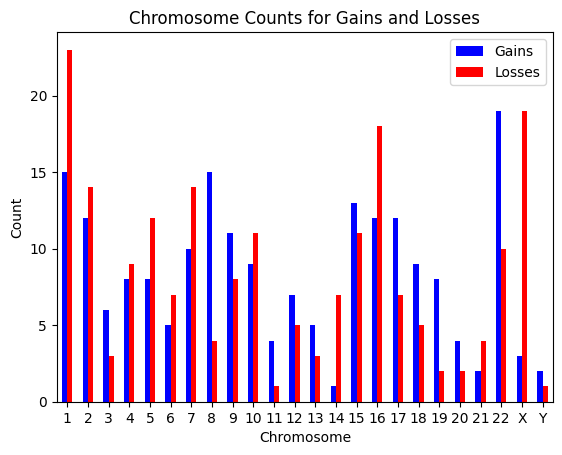

In [ ]:
# Create a pandas DataFrame for the chromosome counts
df = pd.DataFrame({'Gains': gains_dict, 'Losses': losses_dict})

# Define the color scheme
colors = {'Gains': 'blue', 'Losses': 'red'}

# Plot the bar chart
ax = df.plot.bar(rot=0, color=colors)

# Set the chart title and axis labels
ax.set_title('Chromosome Counts for Gains and Losses')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Count')

# Display the chart
plt.show()

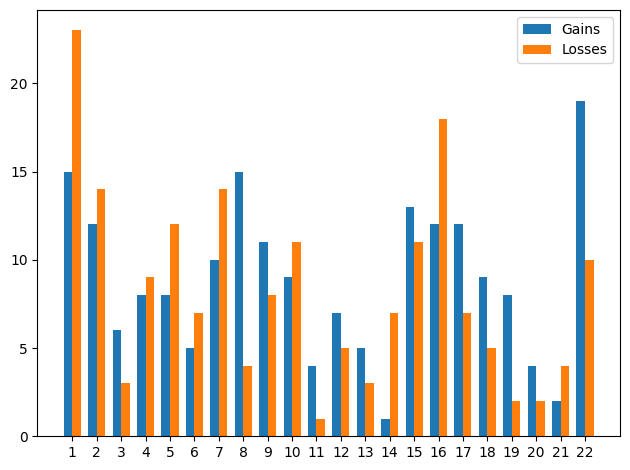

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

gains = gains_dict
losses = losses_dict

x_labels = sorted(list(gains.keys())[:-2], key=lambda x: int(x))

fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(x_labels))

rects1 = ax.bar(x - width/2, [gains[label] for label in x_labels], width, label='Gains')
rects2 = ax.bar(x + width/2, [losses[label] for label in x_labels], width, label='Losses')

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

fig.tight_layout()
plt.show()

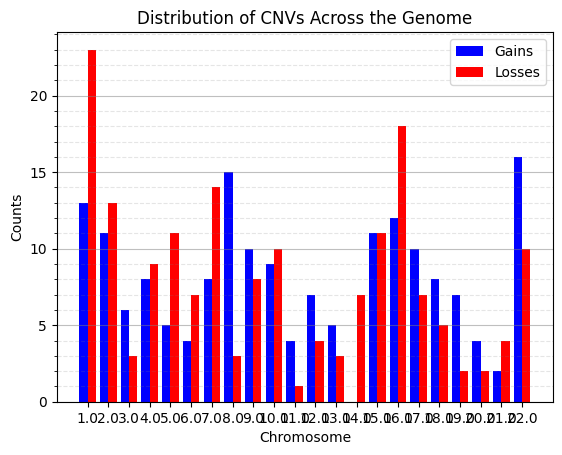

In [ ]:
from matplotlib.ticker import AutoMinorLocator

# # Remove the 'X' and 'Y' rows from both columns
# data = data[(data['Gains'] != 'X') & (data['Gains'] != 'Y')]      # this erroneously removes the entire row
# data = data[(data['Losses'] != 'X') & (data['Losses'] != 'Y')]    # this erroneously removes the entire row

# Remove 'X' and 'Y' from both columns
data = data.replace(['X', 'Y'], np.nan)
data = data.dropna()

# Convert the 'Gains' and 'Losses' columns to numeric
data['Gains'] = pd.to_numeric(data['Gains'])
data['Losses'] = pd.to_numeric(data['Losses'])

# data.loc[data['Gains'] == 'X', 'Gains'] = np.nan
# data.loc[data['Losses'] == 'X', 'Losses'] = np.nan

# Create a new DataFrame with counts for each chromosome in both columns
chromosome_counts = pd.concat([data['Gains'].value_counts(), data['Losses'].value_counts()], axis=1)

# Reset the index to convert the chromosome values into a column
chromosome_counts = chromosome_counts.reset_index()

chromosome_counts

# Rename the columns to 'Chromosome' and 'Counts'
chromosome_counts.columns = ['Chromosome', 'Gains', 'Losses']

# Create a new column 'Total' with the sum of gains and losses
chromosome_counts['Total'] = chromosome_counts['Gains'] + chromosome_counts['Losses']

# Exclude the 'X' and 'Y' rows from the DataFrame
chromosome_counts = chromosome_counts[~chromosome_counts['Chromosome'].isin(['X', 'Y'])]

# Sort the remaining chromosomes by ascending order
chromosome_counts = chromosome_counts.sort_values(by=['Chromosome'], ascending=True)

# Create a grouped barplot with the 'Gains' and 'Losses' columns side-by-side
bar_width = 0.4
fig, ax = plt.subplots()
ax.bar(np.arange(len(chromosome_counts['Chromosome'])) - bar_width/2, chromosome_counts['Gains'], width=bar_width, label='Gains', color='blue')
ax.bar(np.arange(len(chromosome_counts['Chromosome'])) + bar_width/2, chromosome_counts['Losses'], width=bar_width, label='Losses', color='red')

# Set minor ticks on the y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Add horizontal grid lines
ax.grid(which='major', axis='y', linestyle='-', color='grey', alpha=0.5)
ax.grid(which='minor', axis='y', linestyle='--', color='grey', alpha=0.2)

# Set the x-axis ticks to the chromosome names
ax.set_xticks(np.arange(len(chromosome_counts['Chromosome'])))
ax.set_xticklabels(chromosome_counts['Chromosome'])

# Set the title and axis labels
ax.set_title('Distribution of CNVs Across the Genome')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Counts')

# Add a legend
ax.legend()

# Display the plot
plt.show()

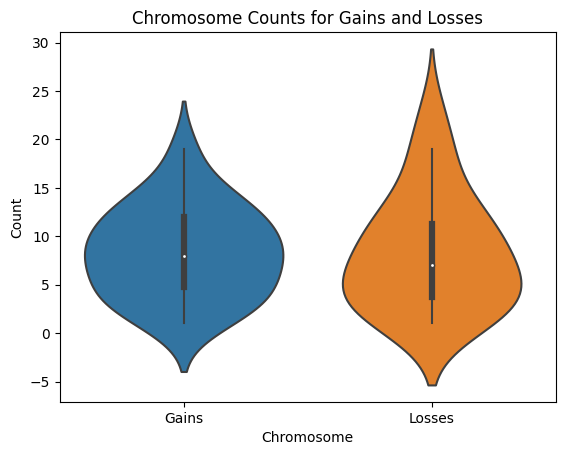

In [ ]:
import pandas as pd
import seaborn as sns

# # Count the number of occurrences of each chromosome in the 'Gains' column
# for chrom in sorted(data['Gains'].unique()):
#     if chrom != 'X' and chrom != 'Y':
#         count = data['Gains'].value_counts()[chrom]
#         gains_dict[int(chrom)] = count

# # Count the number of occurrences of each chromosome in the 'Losses' column
# for chrom in sorted(data['Losses'].unique()):
#     if chrom != 'X' and chrom != 'Y':
#         count = data['Losses'].value_counts()[chrom]
#         losses_dict[int(chrom)] = count

# # Add the counts for X and Y chromosomes to the dictionaries
# gains_dict['X'] = data['Gains'].value_counts()['X']
# gains_dict['Y'] = data['Gains'].value_counts()['Y']
# losses_dict['X'] = data['Losses'].value_counts()['X']
# losses_dict['Y'] = data['Losses'].value_counts()['Y']

# # Sort the dictionaries by the numerical value of the keys (ignoring X and Y)
# gains_dict = dict(sorted(gains_dict.items(), key=lambda x: x[0] if isinstance(x[0], int) else float('inf')))
# losses_dict = dict(sorted(losses_dict.items(), key=lambda x: x[0] if isinstance(x[0], int) else float('inf')))

# Create a pandas DataFrame for the chromosome counts
df = pd.DataFrame({'Gains': list(gains_dict.values()), 'Losses': list(losses_dict.values())}, index=list(gains_dict.keys()))

# Create a violinplot using seaborn
sns.violinplot(data=df)

# Set the chart title and axis labels
plt.title('Chromosome Counts for Gains and Losses')
plt.xlabel('Chromosome')
plt.ylabel('Count')

# Display the chart
plt.show()


#**GPO Distribution Figure and Summary Statistics**



In [ ]:
# Read in the GPO data file

import pandas as pd
GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')
GPO_data

,gains,losses
0,93.24,77.25
1,99.98,54.36
2,62.88,98.60
3,97.85,99.75
4,90.95,87.63
...,...,...
195,99.21,97.26
196,92.16,98.61
197,95.56,9.61
198,79.58,96.82


In [ ]:
# Just checking the data in gains and losses

# # Count the number of gains with GPO lengths between 99.5 and 100
# num_gains = ((gains >= 99.5) & (gains <= 100)).sum()
# print(f'The number of gains with GPO lengths between 99.5 and 100 is: {num_gains}')

# # Count the number of losses with GPO lengths between 2 and 3
# num_losses = ((losses >= 2.5) & (losses <= 3)).sum()
# print(f'The number of losses with GPO lengths between 2 and 3 is: {num_losses}')

# num_gains = ((gains >= 100) & (gains <= 101)).sum()
# print(num_gains)

# num_losses = ((losses == 100)).sum()
# print(num_losses)

gains = GPO_data['gains']
losses = GPO_data['losses']
# combined = pd.concat([gains, losses], axis=1).dropna()
combined = pd.concat([gains, losses], axis=0, ignore_index=True, sort=False)
combined = pd.DataFrame({'gains_and_losses': combined})

# Drop any rows with missing values
combined.dropna(inplace=True)

print(gains.describe())
print(losses.describe())
print(combined.describe())
print('Gains median:',GPO_data['gains'].median())
print('Losses median:',GPO_data['losses'].median())
print('Combined median:',combined.median())

print('Percent Gains >=95%:',(gains >= 95.0).sum()*100/199)
print('Percent Losses >=95%:',(losses >= 95.0).sum()*100/200)

# for x in gains:
#   if x >=100:
#     print(x)

count    199.000000
mean      89.857688
std       14.848671
min       26.710000
25%       87.350000
50%       96.720000
75%       98.975000
max      100.000000
Name: gains, dtype: float64
count    200.000000
mean      82.103800
std       23.797041
min        2.700000
25%       72.297500
50%       94.170000
75%       99.202500
max      100.000000
Name: losses, dtype: float64
       gains_and_losses
count        399.000000
mean          85.971028
std           20.196670
min            2.700000
25%           82.510000
50%           95.280000
75%           99.125000
max          100.000000
Gains median: 96.72
Losses median: 94.17
Combined median: gains_and_losses    95.28
dtype: float64
Percent Gains >=95%: 55.778894472361806
Percent Losses >=95%: 46.5


In [ ]:
# Create a table showing cutoff values for gains and losses

# Combine the 'gains' and 'losses' columns into a new DataFrame called GPO_data_long
GPO_data_long = pd.concat([GPO_data['gains'], GPO_data['losses']], axis=0, ignore_index=True)

# Drop the NA values from GPO_data_long
GPO_data_long = GPO_data_long.dropna()

# Define the cutoff values
cutoffs = [90, 95, 99, 99.5, 99.9]

# Initialize the data for the table
data = []

# Iterate over the cutoff values
for cutoff in cutoffs:
    # Calculate the percentage of gains greater than or equal to the cutoff
    gain_pct = (GPO_data['gains'].dropna() >= cutoff).mean() * 100
    
    # Calculate the percentage of losses greater than or equal to the cutoff
    loss_pct = (GPO_data['losses'].dropna() >= cutoff).mean() * 100
    
    # Calculate the percentage of total (gains + losses) greater than or equal to the cutoff
    total_pct = (GPO_data_long >= cutoff).mean() * 100

    # Append the data to the list
    data.append([cutoff, gain_pct, loss_pct, total_pct])

# Create the DataFrame from the data
table = pd.DataFrame(data, columns=['Cutoff', 'Gains', 'Losses', 'Total'])

# Print the table
print(table)

   Cutoff      Gains  Losses      Total
0    90.0  69.346734    57.0  63.157895
1    95.0  55.778894    46.5  51.127820
2    99.0  24.623116    28.5  26.566416
3    99.5  19.597990    19.0  19.298246
4    99.9  14.572864     8.5  11.528822


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Extract the 'gains' and 'losses' columns
gains = GPO_data['gains'].dropna()
losses = GPO_data['losses'].dropna()

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(gains, losses)

# Print the results
print("U statistic: ", u_statistic)
print("p-value: ", p_value)

U statistic:  22586.0
p-value:  0.019698181856477814


<ipython-input-31-3be3fcb6dece>:18: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


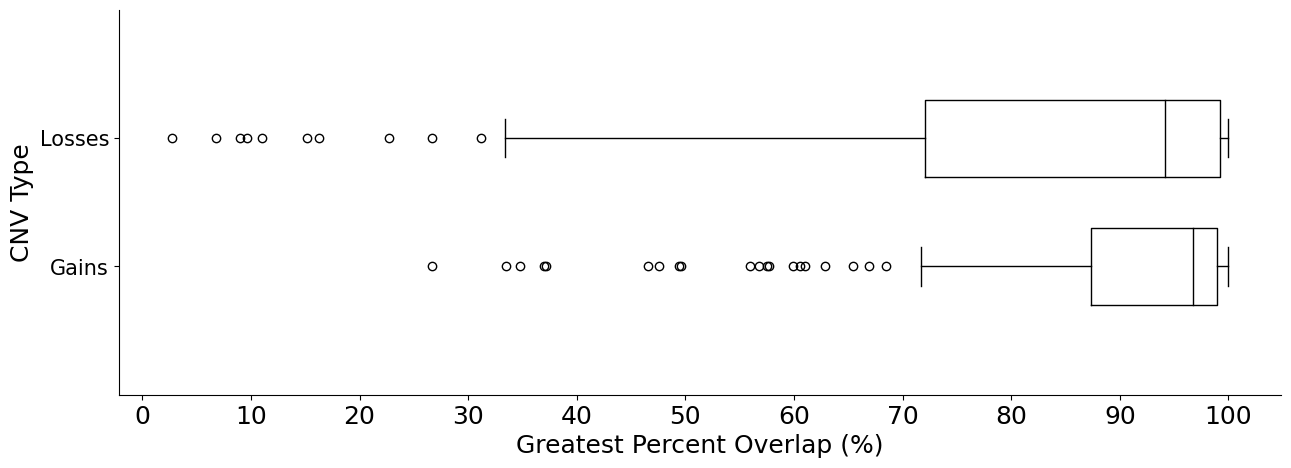

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')

# Create a boxplot to compare the gains and losses
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(GPO_data.dropna(), positions=[1.0, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'), vert=False)

# Add labels and a title to the plot
ax.set_xticks(range(0, 101, 10))
ax.set_xlabel('Greatest Percent Overlap (%)', fontsize=18)
ax.set_ylabel('CNV Type', fontsize=18)
# ax.set_title('Greatest Percent Overlap Distribution', fontsize=30)

# Change font size of x-tick labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

# Increase font size of Gains and Losses labels
ax.set_yticklabels(['Gains', 'Losses'], fontsize=15)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

<ipython-input-38-a0a0419094e7>:34: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


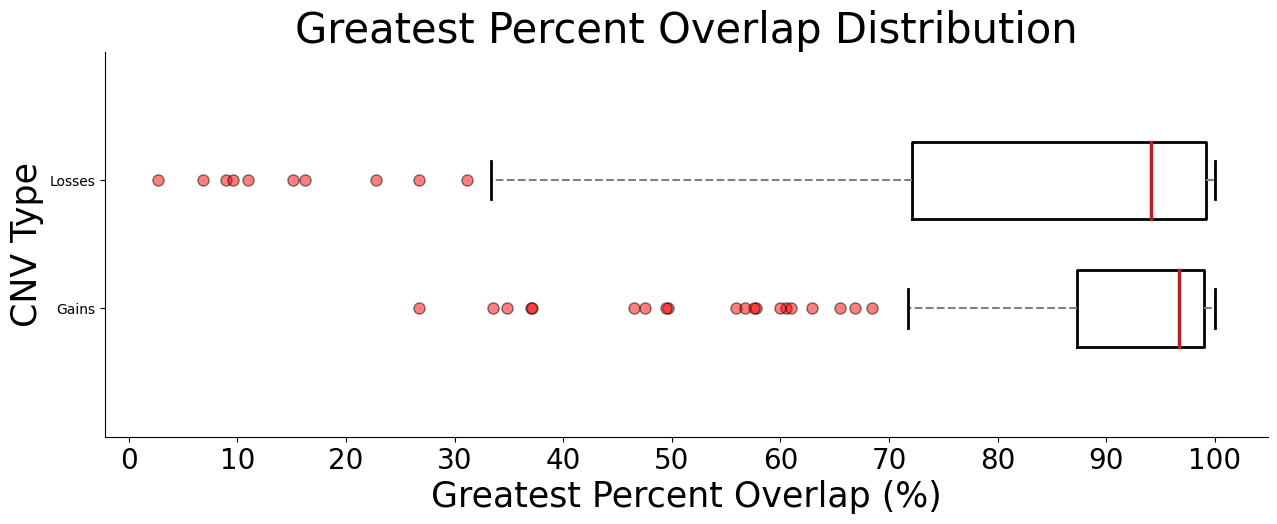

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')

# Create a boxplot to compare the gains and losses
fig, ax = plt.subplots(figsize=(15, 5))
boxprops = dict(linestyle='-', linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.5)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')
capprops = dict(linestyle='-', linewidth=2, color='black')
ax.boxplot(GPO_data.dropna(), positions=[1.0, 1.5], labels=['Gains', 'Losses'], widths=0.3, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanprops, whiskerprops=whiskerprops, capprops=capprops, vert=False)

# Add median, 1st quartile, and 3rd quartile values above the boxplots
for i, box in enumerate(ax.artists):
    x0, y0, x1, y1 = box.get_bbox().bounds
    median_val = ax.medians[i].get_ydata()[0]
    q1_val = ax.artists[i].get_paths()[0].vertices[1, 1]
    q3_val = ax.artists[i].get_paths()[0].vertices[2, 1]
    ax.text(x1, median_val, f'{median_val:.2f}', va='center', ha='left', fontsize=16)
    ax.text(x1, q1_val, f'{q1_val:.2f}', va='center', ha='left', fontsize=16)
    ax.text(x1, q3_val, f'{q3_val:.2f}', va='center', ha='left', fontsize=16)

# Add labels and a title to the plot
ax.set_xticks(range(0, 101, 10))
ax.set_xlabel('Greatest Percent Overlap (%)', fontsize=25)
ax.set_ylabel('CNV Type', fontsize=25)
ax.set_title('Greatest Percent Overlap Distribution', fontsize=30)

# Change font size of x-tick labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

<ipython-input-34-30c77cb16748>:33: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


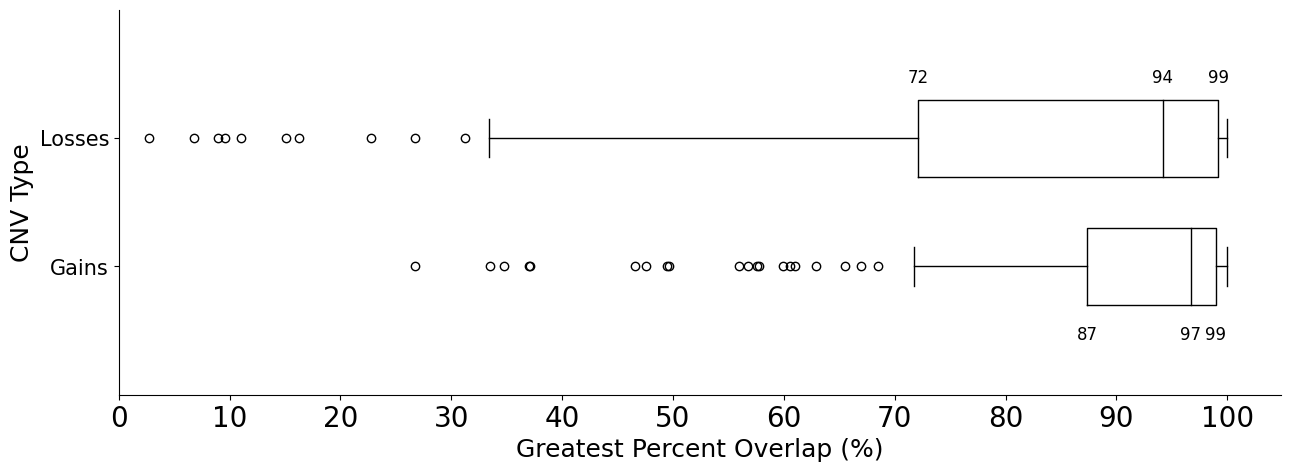

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')

# Create a boxplot to compare the gains and losses
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(GPO_data.dropna(), positions=[1.0, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'), vert=False)

# Add labels and a title to the plot
ax.set_xticks(range(0, 101, 10))
ax.set_xlabel('Greatest Percent Overlap (%)', fontsize=18)
ax.set_ylabel('CNV Type', fontsize=18)
# ax.set_title('Greatest Percent Overlap Distribution', fontsize=30)

# Add values above the boxplots
medians = GPO_data.dropna().median()
q1 = GPO_data.dropna().quantile(0.25)
q3 = GPO_data.dropna().quantile(0.75)

# for i, val in enumerate(medians):
#     ax.text(val, i+1, f'{val:.2f}', fontsize=12, color='black', ha='center', va='bottom')
#     ax.text(q1[i], i+1.2, f'{q1[i]:.2f}', fontsize=12, color='black', ha='center', va='bottom')
#     ax.text(q3[i], i+0.8, f'{q3[i]:.2f}', fontsize=12, color='black', ha='center', va='bottom')

for i, val in enumerate(medians):
    ax.text(val, 1+i, f'{val:.0f}', fontsize=12, color='black', ha='center', va='bottom', position=(val, 0.7+i))
    ax.text(q1[i], 1.2+i, f'{q1[i]:.0f}', fontsize=12, color='black', ha='center', va='bottom', position=(q1[i], 0.7+i))
    ax.text(q3[i], 0.8+i, f'{q3[i]:.0f}', fontsize=12, color='black', ha='center', va='bottom', position=(q3[i], 0.7+i))

# Change font size of x-tick labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

# Increase font size of Gains and Losses labels
ax.set_yticklabels(['Gains', 'Losses'], fontsize=15)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
ax.set_xlim(left=0)
plt.show()

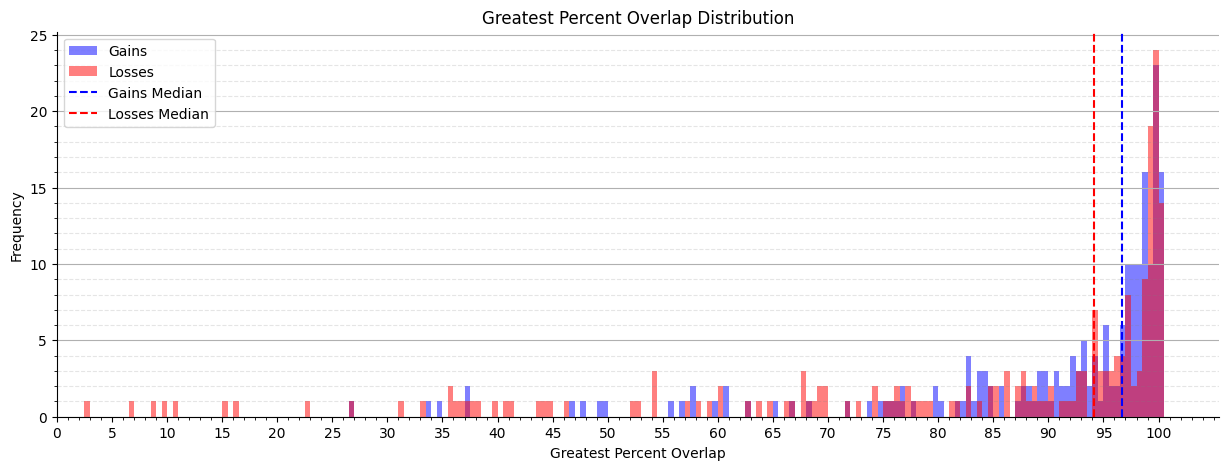

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

# Extract the gains and losses columns into separate variables
gains = GPO_data['gains']
losses = GPO_data['losses']

# Set up the histogram plot with the desired bin size and colors
bin_size = 0.5
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(gains, bins=np.arange(0, 101, bin_size), color='blue', alpha=0.5, label='Gains')
ax.hist(losses, bins=np.arange(0, 101, bin_size), color='red', alpha=0.5, label='Losses')

# Add vertical lines at the median of gains and losses
ax.axvline(gains.median(), color='blue', linestyle='--', label='Gains Median')
ax.axvline(x=np.median(losses), color='red', linestyle='--', label='Losses Median')

# Set the plot title, axes labels, and legend
ax.set_title('Greatest Percent Overlap Distribution')
ax.set_xlabel('Greatest Percent Overlap')
ax.set_ylabel('Frequency')
ax.legend()

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add more X axis tick marks and horizontal gridlines
ax.set_xticks(range(0, 101, 5))
ax.grid(which='minor', axis='y', linestyle='--', color='grey', alpha=0.2)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.grid(which='both', axis='x', alpha=0.5)
ax.xaxis.grid(False)

# Add more X axis tick marks and minor tick marks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.grid(which='both', axis='x', alpha=0)
ax.yaxis.grid(True)

# Show the plot
ax.set_xlim(left=0)
plt.show()

In [ ]:
percent_above_90_G = (len(gains[gains >= 90]) / len(gains)) * 100
print("Percentage of values in gains dataframe that are at least 90: {:.2f}%".format(percent_above_90_G))
print("N for gains >= 90:", len(gains[gains >= 90]))

percent_above_90_L = (len(losses[losses >= 90]) / len(losses)) * 100
print("Percentage of values in losses dataframe that are at least 90: {:.2f}%".format(percent_above_90_L))
print("N for losses >= 90:", len(losses[losses >= 90]))

Percentage of values in gains dataframe that are at least 90: 69.00%
N for gains >= 90: 138
Percentage of values in losses dataframe that are at least 90: 57.00%
N for losses >= 90: 114


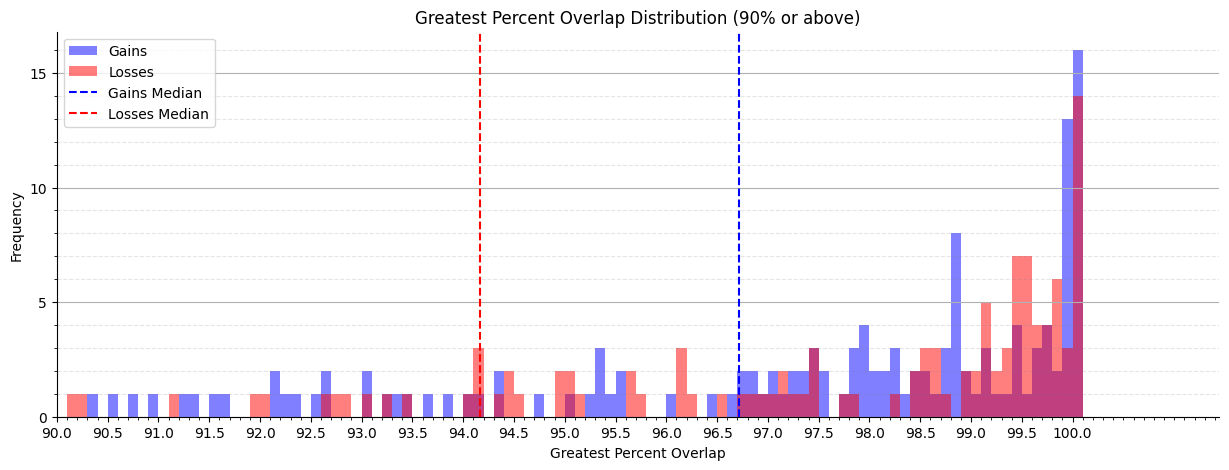

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

# Extract the gains and losses columns into separate variables
gains = GPO_data[GPO_data['gains'] >= 90]['gains']
losses = GPO_data[GPO_data['losses'] >= 90]['losses']
gains_real = GPO_data['gains']
losses_real = GPO_data['losses']

# Set up the histogram plot with the desired bin size and colors
bin_size = 0.1
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(gains, bins=np.arange(90, 101, bin_size), color='blue', alpha=0.5, label='Gains')
ax.hist(losses, bins=np.arange(90, 101, bin_size), color='red', alpha=0.5, label='Losses')

# Add vertical lines at the median of gains and losses
ax.axvline(gains_real.median(), color='blue', linestyle='--', label='Gains Median')
ax.axvline(x=np.median(losses_real), color='red', linestyle='--', label='Losses Median')

# Set the plot title, axes labels, and legend
ax.set_title('Greatest Percent Overlap Distribution (90% or above)')
ax.set_xlabel('Greatest Percent Overlap')
ax.set_ylabel('Frequency')
ax.legend(loc='upper left')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add more X axis tick marks and horizontal gridlines
ax.set_xticks(np.arange(90, 100.5, 0.5))
ax.grid(which='minor', axis='y', linestyle='--', color='grey', alpha=0.2)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.grid(which='both', axis='x', alpha=0.5)
ax.xaxis.grid(False)

# Add more X axis tick marks and minor tick marks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='both', axis='x', alpha=0)
ax.yaxis.grid(True)

# Show the plot
ax.set_xlim(left=90)
plt.show()

##***Everything below this cell was not used for the GPO Distribution figure***

In [ ]:
# Create a table showing cutoff values for gains and losses

# Define the cutoff values
cutoffs = [90, 95, 99, 99.5, 99.9]

# Initialize the data for the table
data = []

# Iterate over the cutoff values
for cutoff in cutoffs:
    # Calculate the percentage of gains greater than or equal to the cutoff
    gain_pct = (GPO_data['gains'].dropna() >= cutoff).mean() * 100
    
    # Calculate the percentage of losses greater than or equal to the cutoff
    loss_pct = (GPO_data['losses'].dropna() >= cutoff).mean() * 100
    
    # Calculate the percentage of total (gains + losses) greater than or equal to the cutoff
    total_pct = ((GPO_data['gains'] + GPO_data['losses']).dropna() >= cutoff).mean() * 100

    # Append the data to the list
    data.append([cutoff, gain_pct, loss_pct, total_pct])

# Create the DataFrame from the data
table = pd.DataFrame(data, columns=['Cutoff', 'Gains', 'Losses', 'Total'])

# Print the table
print(table)


   Cutoff      Gains  Losses      Total
0    90.0  69.346734    57.0  98.994975
1    95.0  55.778894    46.5  98.492462
2    99.0  24.623116    28.5  97.989950
3    99.5  19.597990    19.0  97.989950
4    99.9  14.572864     8.5  97.989950


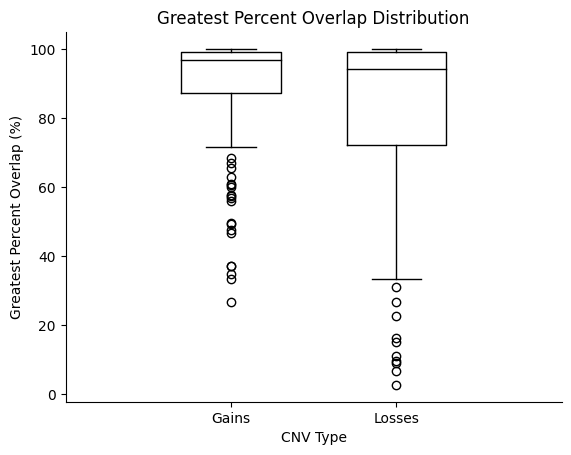

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')

# Create a boxplot to compare the gains and losses
fig, ax = plt.subplots()
ax.boxplot(GPO_data.dropna(), positions=[1.0, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'))

# Add labels and a title to the plot
ax.set_xlabel('CNV Type')
ax.set_ylabel('Greatest Percent Overlap (%)')
ax.set_title('Greatest Percent Overlap Distribution')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

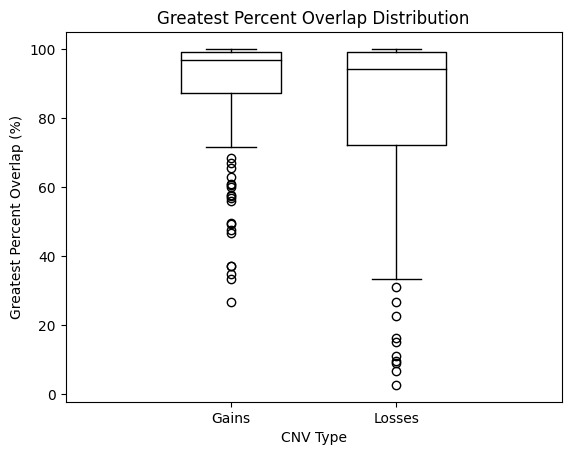

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

GPO_data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/GPO_Distribution.csv')

# Create a boxplot to compare the gains and losses
plt.boxplot(GPO_data.dropna(), positions=[1, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'))

# Add labels and a title to the plot
plt.xlabel('CNV Type')
plt.ylabel('Greatest Percent Overlap (%)')
plt.title('Greatest Percent Overlap Distribution')

# Show the plot
plt.show()

#**CNV Lengths Summary Statistics and Figure**

In [ ]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Set the option to display summary statistics without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Print summary statistics for G_Length column
print("Summary Statistics for pathogenic gain CNVs:")
print(df['G_Length'].describe())

# Print summary statistics for L_Length column
print("\nSummary Statistics for pathogenic loss CNVs:")
print(df['L_Length'].describe())


Summary Statistics for pathogenic gain CNVs:
count         200.00
mean     17377567.30
std      27234772.79
min         93937.00
25%       1698540.75
50%       8088399.50
75%      20083232.00
max     180606212.00
Name: G_Length, dtype: float64

Summary Statistics for pathogenic loss CNVs:
count         200.00
mean      6278179.77
std      14344634.94
min           170.00
25%        511290.25
50%       2789116.00
75%       6034324.75
max     153811037.00
Name: L_Length, dtype: float64


In [ ]:
# Show to longest CNVs for each group
# Sort by Length in descending order
sorted_G = df.sort_values(['G_Length'], ascending=False)
sorted_L = df.sort_values(['L_Length'], ascending=False)

# Display top 10 rows
top_g_lengths = sorted_G[['G_Length']].head(10)
top_l_lengths = sorted_L[['L_Length']].head(10)

# Print tables
print(top_g_lengths.to_string(index=False))
print(top_l_lengths.to_string(index=False))

 G_Length
180606212
141097082
140816527
135379796
135327116
 96075920
 90715563
 77877896
 77853301
 67783104
 L_Length
153811037
 61203364
 58128201
 56737920
 54969663
 52826133
 35262943
 27463577
 24032993
 23947598


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the 3rd and 6th columns
values1 = df.iloc[:,2].values
values2 = df.iloc[:,5].values

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(values1, values2)

# Print the results
print("U statistic: ", u_statistic)
print("p-value: ", p_value)
df


U statistic:  27627.0
p-value:  4.209710853881468e-11


,G_Start,G_End,G_Length,L_Start,L_End,L_Length
0,16526787,24631604,8104817,32041580,32556252,514672
1,203862,141020389,140816527,197586481,200793870,3207389
2,131798679,133454070,1655391,21946438,22441358,494920
3,102949737,103432420,482683,170088905,170892302,803397
4,173786,11677456,11503670,97401423,97401593,170
...,...,...,...,...,...,...
195,84380129,102383473,18003344,168546,9766970,9598424
196,2650278,24445033,21794755,122443197,135477883,13034686
197,17397498,20659606,3262108,68001279,68138241,136962
198,128652785,141044751,12391966,167317903,170919482,3601579


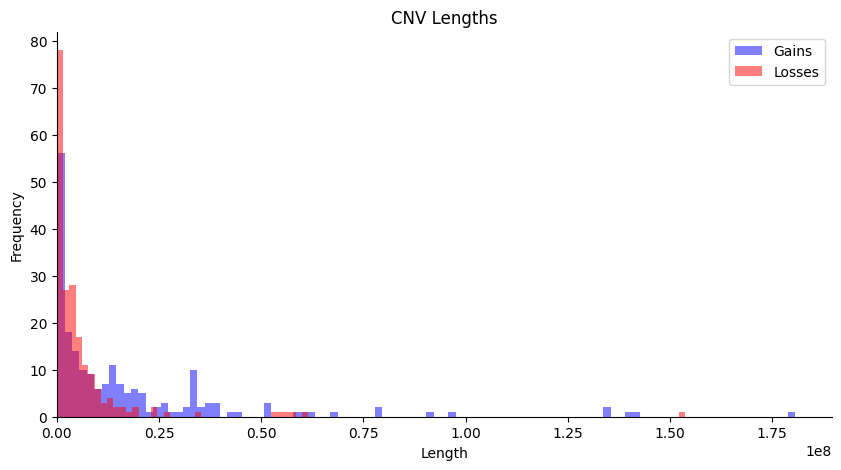

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

fig = plt.figure(figsize=(10, 5))

# Plot the values as histograms using matplotlib
plt.hist(G_Length, bins=100, alpha=0.5, color='blue', label="Gains")
plt.hist(L_Length, bins=100, alpha=0.5, color='red', label="Losses")

# Remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and legend to the plot
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("CNV Lengths")
plt.legend()

# Show the plot
plt.gca().set_xlim(left=0)
plt.show()


<ipython-input-35-d6fa8ba53246>:26: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(10)
<ipython-input-35-d6fa8ba53246>:27: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation(0)


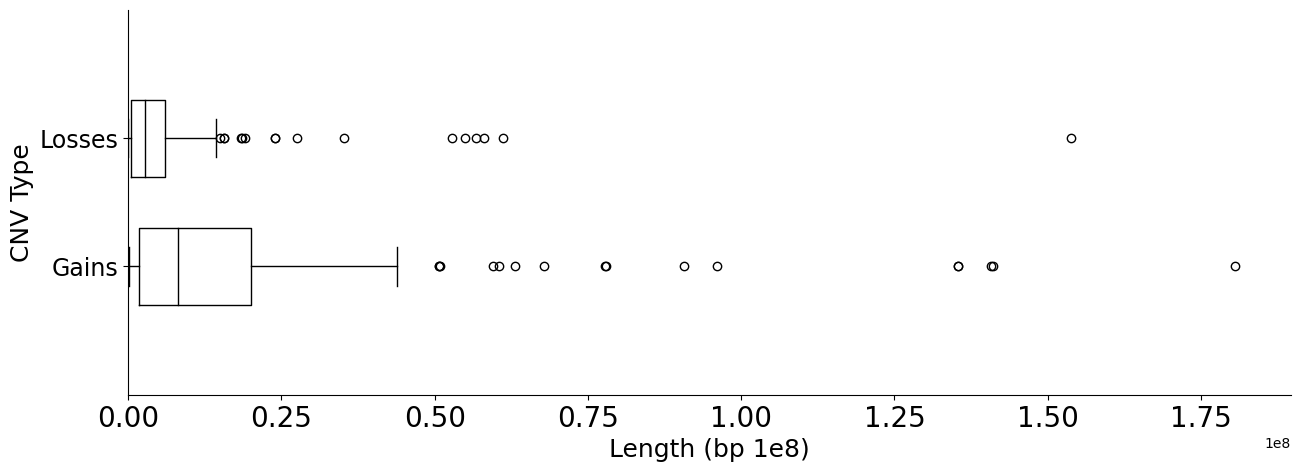

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

# Combine the data into a list
data = [G_Length, L_Length]

fig, ax = plt.subplots(figsize=(15, 5))

# Create a boxplot to compare the gains and losses
ax.boxplot(data, positions=[1, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'), vert=False)

# Add labels and title to the plot
ax.set_xlabel("Length (bp 1e8)", fontsize=18)
ax.set_ylabel("CNV Type", fontsize=18)
# ax.set_title("Query CNV Lengths", fontsize=30)

# Change font size of x-tick labels
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(10)
  tick.label.set_rotation(0)
ax.xaxis.set_tick_params(labelsize=20)

# Increase font size of Gains and Losses labels
ax.set_yticklabels(['Gains', 'Losses'], fontsize=17)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(left=0)
plt.show()

##***Everything below this cell was not used for the CNV lengths figure***

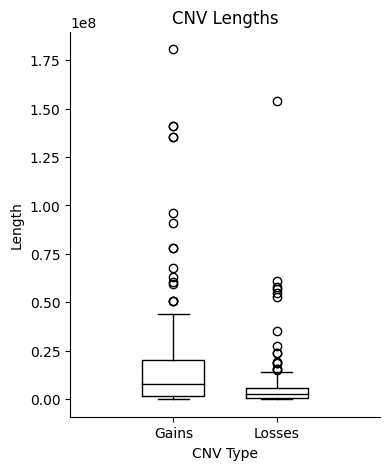

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

# Combine the data into a list
data = [G_Length, L_Length]

fig, ax = plt.subplots(figsize=(4, 5))

# Create a boxplot to compare the gains and losses
ax.boxplot(data, positions=[1, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'))

# Add labels and title to the plot
ax.set_xlabel("CNV Type")
ax.set_ylabel("Length")
ax.set_title("CNV Lengths")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

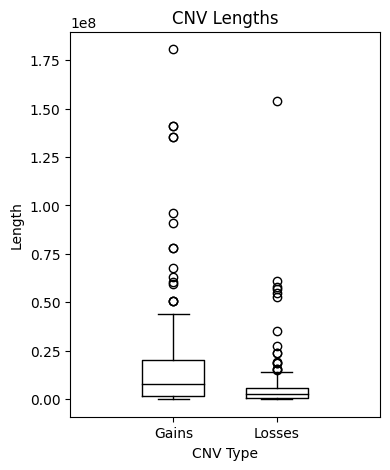

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

# Combine the data into a list
data = [G_Length, L_Length]

fig = plt.figure(figsize=(4, 5))

# Create a boxplot to compare the gains and losses
plt.boxplot(data, positions=[1, 1.5], labels=['Gains', 'Losses'], widths=0.3, medianprops=dict(color='black'))

# Add labels and title to the plot
plt.xlabel("CNV Type")
plt.ylabel("Length")
plt.title("CNV Lengths")

plt.show()

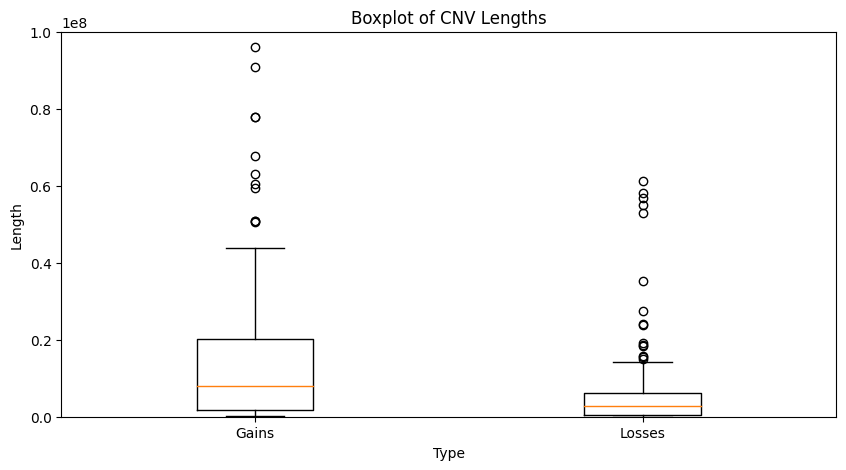

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

# Combine the data into a list
data = [G_Length, L_Length]

fig = plt.figure(figsize=(10, 5))

# Create a boxplot to compare the gains and losses
plt.boxplot(data, labels=['Gains', 'Losses'], widths=0.3)

# Set the y-axis limits
plt.ylim(0, 100000000)

# Add labels and title to the plot
plt.xlabel("Type")
plt.ylabel("Length")
plt.title("Boxplot of CNV Lengths")

# Show the plot
plt.show()


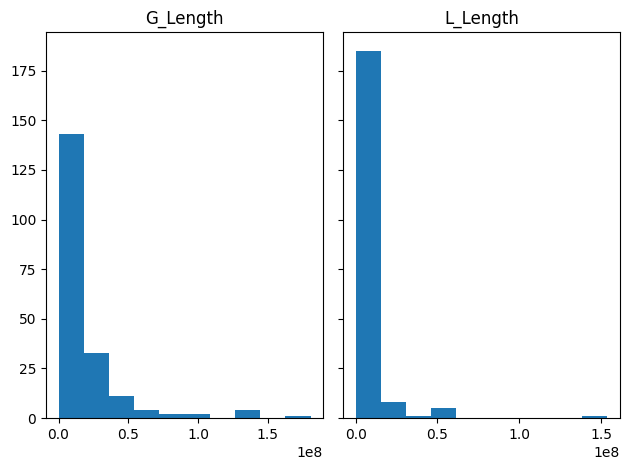

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Plot histograms of G_Length and L_Length columns side by side
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df['G_Length'])
axs[1].hist(df['L_Length'])
axs[0].set_title('G_Length')
axs[1].set_title('L_Length')
plt.show()


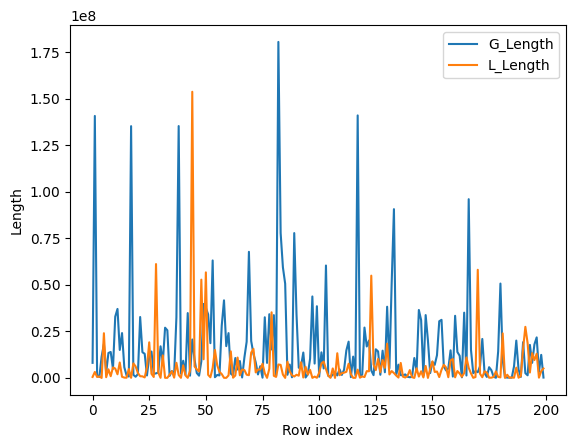

,G_Start,G_End,G_Length,L_Start,L_End,L_Length
0,16526787,24631604,8104817,32041580,32556252,514672
1,203862,141020389,140816527,197586481,200793870,3207389
2,131798679,133454070,1655391,21946438,22441358,494920
3,102949737,103432420,482683,170088905,170892302,803397
4,173786,11677456,11503670,97401423,97401593,170
...,...,...,...,...,...,...
195,84380129,102383473,18003344,168546,9766970,9598424
196,2650278,24445033,21794755,122443197,135477883,13034686
197,17397498,20659606,3262108,68001279,68138241,136962
198,128652785,141044751,12391966,167317903,170919482,3601579


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/CNV_Lengths.csv')

# Extract the values from the G_Length and L_Length columns
G_Length = data['G_Length']
L_Length = data['L_Length']

# Plot the values using matplotlib
plt.plot(G_Length, label="G_Length")
plt.plot(L_Length, label="L_Length")

# Add labels and legend to the plot
plt.xlabel("Row index")
plt.ylabel("Length")
plt.legend()

# Show the plot
plt.show()

data


#**Overlap Type Figure**

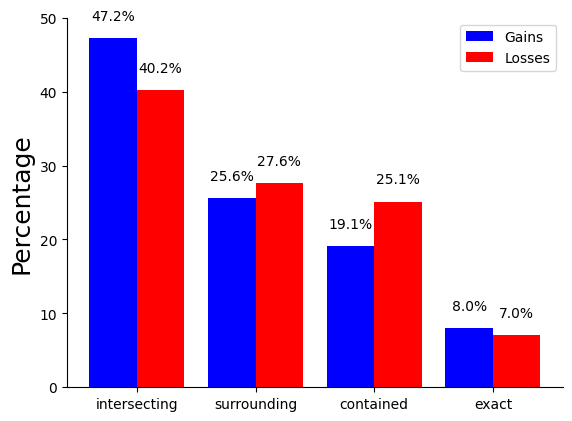

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Overlap_Types.csv').dropna()

# Count the number of each type of value in each column
gains_counts = df["gains"].value_counts(normalize=True) * 100
losses_counts = df["losses"].value_counts(normalize=True) * 100

# Create a grouped bar chart of the counts
fig, ax = plt.subplots()
bar_width = 0.4
x_gains = range(len(gains_counts))
x_losses = [i + bar_width for i in x_gains]
ax.bar(x_gains, gains_counts.values, bar_width, label="Gains", color='b')
ax.bar(x_losses, losses_counts.values, bar_width, label="Losses", color='r')
ax.legend()
# ax.set_xlabel("Overlap Type", fontsize=18)
ax.set_ylabel("Percentage", fontsize=18)
# ax.set_title("Type of Overlap")
plt.xticks([i + bar_width/2 for i in x_gains], gains_counts.index)
plt.yticks(range(0, 60, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add count values above each bar
for i, count in enumerate(gains_counts.values):
    ax.text(i, count+2, str(round(count, 1)) + '%', ha='center', va='bottom')
for i, count in enumerate(losses_counts.values):
    ax.text(i+bar_width, count+2, str(round(count, 1)) + '%', ha='center', va='bottom')

plt.show()

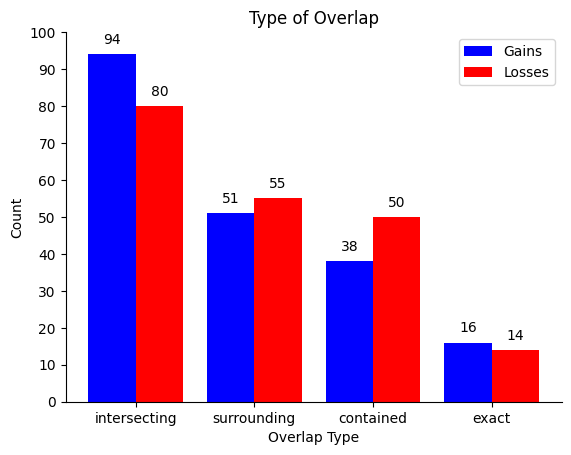

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Overlap_Types.csv').dropna()

# Count the number of each type of value in each column
gains_counts = df["gains"].value_counts()
losses_counts = df["losses"].value_counts()

# Create a grouped bar chart of the counts
fig, ax = plt.subplots()
bar_width = 0.4
x_gains = range(len(gains_counts))
x_losses = [i + bar_width for i in x_gains]
ax.bar(x_gains, gains_counts.values, bar_width, label="Gains", color='b')
ax.bar(x_losses, losses_counts.values, bar_width, label="Losses", color='r')
ax.legend()
ax.set_xlabel("Overlap Type")
ax.set_ylabel("Count")
ax.set_title("Type of Overlap")
plt.xticks([i + bar_width/2 for i in x_gains], gains_counts.index)
plt.yticks(range(0, 110, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add count values above each bar
for i, count in enumerate(gains_counts.values):
    ax.text(i, count+2, str(count), ha='center', va='bottom')
for i, count in enumerate(losses_counts.values):
    ax.text(i+bar_width, count+2, str(count), ha='center', va='bottom')
    
plt.show()

##***Everything below this cell was not used for the Overlap Type figure***

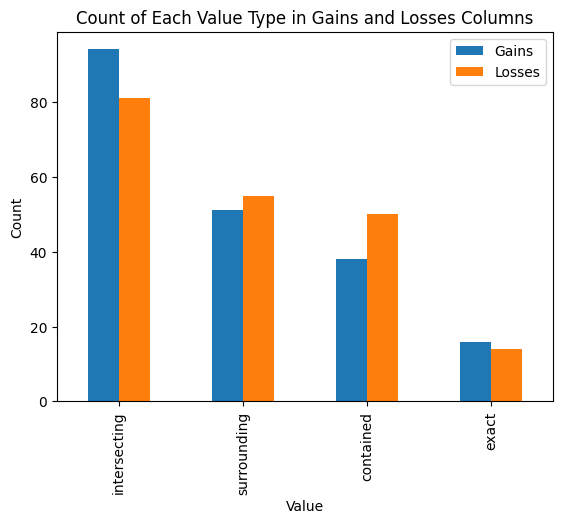

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Overlap_Types.csv')

# Count the number of each type of value in each column
gains_counts = df["gains"].value_counts()
losses_counts = df["losses"].value_counts()

# Create a DataFrame with the counts
data = pd.DataFrame({"Gains": gains_counts, "Losses": losses_counts})

# Create a grouped bar chart of the counts
ax = data.plot.bar(stacked=False)
ax.set_xlabel("Value")
ax.set_ylabel("Count")
ax.set_title("Count of Each Value Type in Gains and Losses Columns")
plt.show()

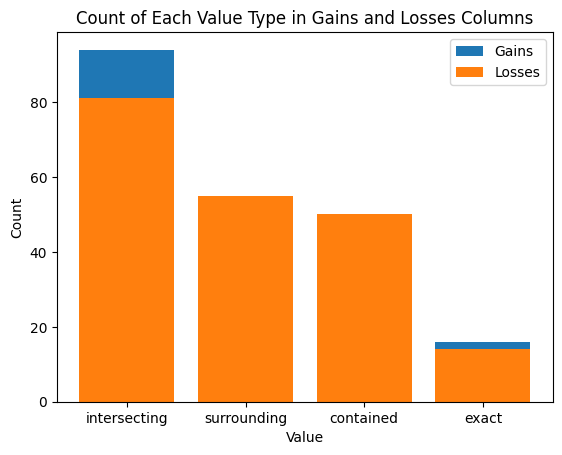

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/Overlap_Types.csv')

# Count the number of each type of value in each column
gains_counts = df["gains"].value_counts()
losses_counts = df["losses"].value_counts()

# Create a bar chart of the counts
fig, ax = plt.subplots()
ax.bar(gains_counts.index, gains_counts.values, label="Gains")
ax.bar(losses_counts.index, losses_counts.values, label="Losses")
ax.legend()
ax.set_xlabel("Value")
ax.set_ylabel("Count")
ax.set_title("Count of Each Value Type in Gains and Losses Columns")
plt.show()


#**GPO and Article Matches Figure**

In [ ]:
# Define the function to make this figure
import pandas as pd
import matplotlib.pyplot as plt

def GPO_articles_scatterplot(input_file, color, my_title):
  # Sort the data by the X column in ascending order
  data = input_file.sort_values(by="GPO")

  # Extract the columns of interest
  x = data["GPO"]
  y = data["Article Matches (for GPO CNV)"]

  # Create the scatter plot
  fig, ax = plt.subplots(figsize=(16, 6)) # Set the figure size to 16x6 inches
  ax.scatter(x, y, color=color)

  # Add a horizontal line at 100
  ax.axhline(y=100, color='r', linestyle='--')

  # Color all points above the line in black
  ax.scatter(x[y > 100], y[y > 100], color='k')

  # Add vertical dotted lines at each interval of 10
  for i in range(0, 101, 10):
      ax.axvline(x=i, color='gray', linestyle='dotted')

  # Label every 10th percent on the X axis
  ax.set_xticks(range(0, 101, 10))

  # Change font size of x-tick labels
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)

  # Change font size of y-tick labels
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

  # Add axis labels and a title
  ax.set_xlabel("Greatest Percent Overlap (%)",fontsize=18)
  ax.set_ylabel("Article Matches (for GPO CNV)",fontsize=18)
  # ax.set_title(my_title, fontsize=25)

  ax.set_ylim(bottom=0)
  ax.set_xlim(left=0)

  # Display the plot
  plt.show()

<ipython-input-41-27928e2fd898>:32: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
<ipython-input-41-27928e2fd898>:36: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


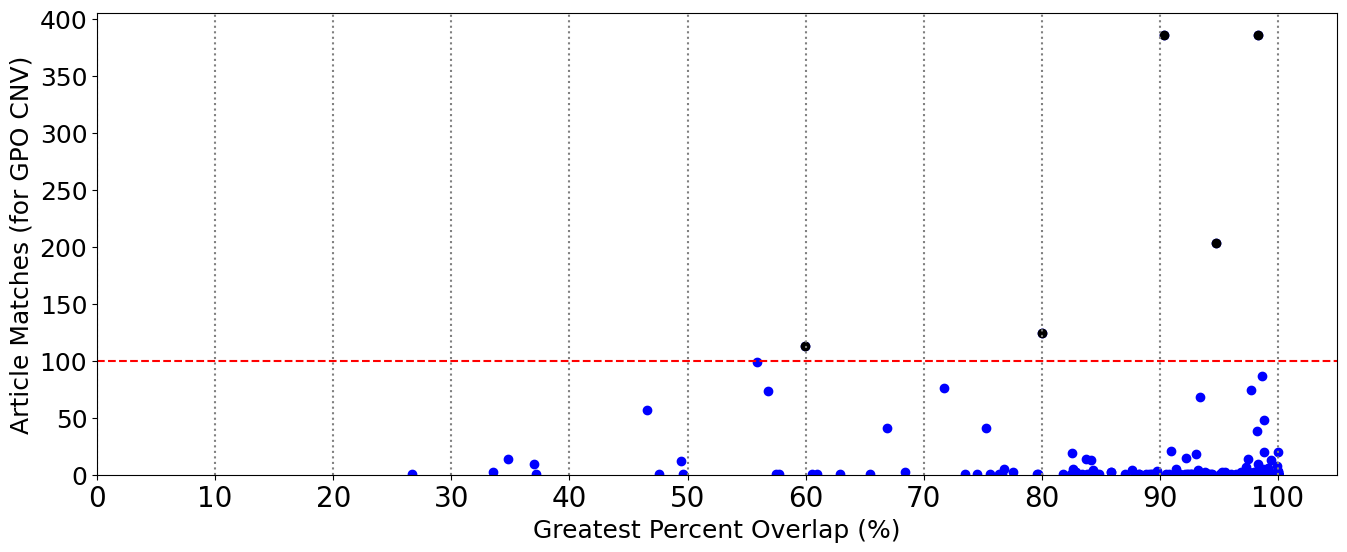

In [ ]:
from pickle import TRUE
# Make the gains figure
import pandas as pd
gains_file = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/PathogenicGains_GPOs_and_articles.csv')
gains_sorted = gains_file.sort_values(by=["Article Matches (for GPO CNV)"], ascending=False)
gains_sorted
GPO_articles_scatterplot(gains_file,'blue',"Greatest Percent Overlap vs. Article Matches (Gains)")

<ipython-input-41-27928e2fd898>:32: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
<ipython-input-41-27928e2fd898>:36: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


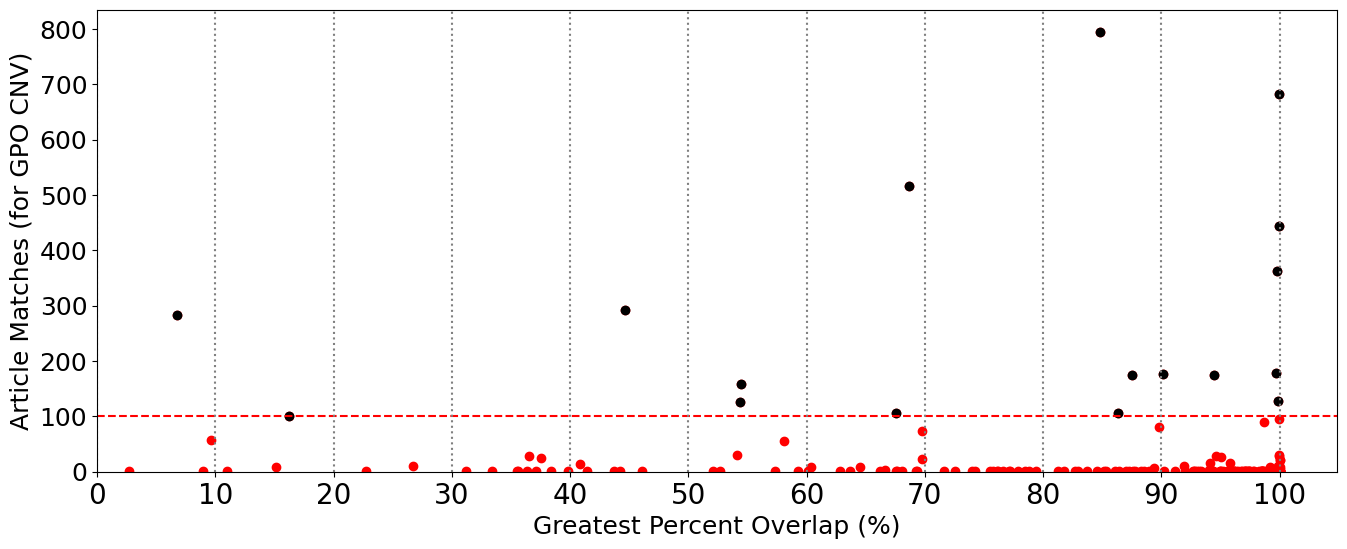

In [ ]:
# Make the losses figure
import pandas as pd
losses_file = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/PathogenicLosses_GPOs_and_articles.csv')
losses_sorted = losses_file.sort_values(by=["Article Matches (for GPO CNV)"], ascending=False)
losses_sorted
GPO_articles_scatterplot(losses_file,'red',"Greatest Percent Overlap vs. Article Matches (Losses)")

In [ ]:
gains_sorted

,GPO,Article Matches (for GPO CNV)
52,98.27,386
122,90.35,386
161,94.72,203
140,80.05,124
151,59.94,113
...,...,...
83,100.00,1
84,99.95,1
85,91.28,1
86,97.32,1


##***Everything below this cell was not used for the GPO and Article Matches figure***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def GPO_articles_scatterplot(input_file, color_col, my_title):
    # Sort the data by the GPO column in ascending order
    data = input_file.sort_values(by="GPO")

    # Extract the columns of interest
    x = data["GPO"]
    y = data["Article Matches"]
    c = data[color_col]

    # Create the scatter plot
    fig, ax = plt.subplots(figsize=(16, 6)) # Set the figure size to 16x6 inches
    ax.scatter(x, y, c=c)

    # Add a horizontal line at 100
    ax.axhline(y=100, color='r', linestyle='--')

    # Color all points above the line in black
    ax.scatter(x[y > 100], y[y > 100], color='k')

    # Add vertical dotted lines at each interval of 10
    for i in range(0, 101, 10):
        ax.axvline(x=i, color='gray', linestyle='dotted')

    # Label every 10th percent on the X axis
    ax.set_xticks(range(0, 101, 10))

    # Add axis labels and a title
    ax.set_xlabel("Greatest Percent Overlap")
    ax.set_ylabel("Article Matches (for GPO CNV)")
    ax.set_title(my_title)

    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)

    # Display the plot
    plt.show()

input_file = pd.read_csv('/content/drive/MyDrive/Capstone Scripts/PathogenicLosses_GPOs_and_articles_CHROMOSOMES.csv', delimiter="\t")
GPO_articles_scatterplot(input_file, "Chromosome", "My Title")

KeyError: ignored

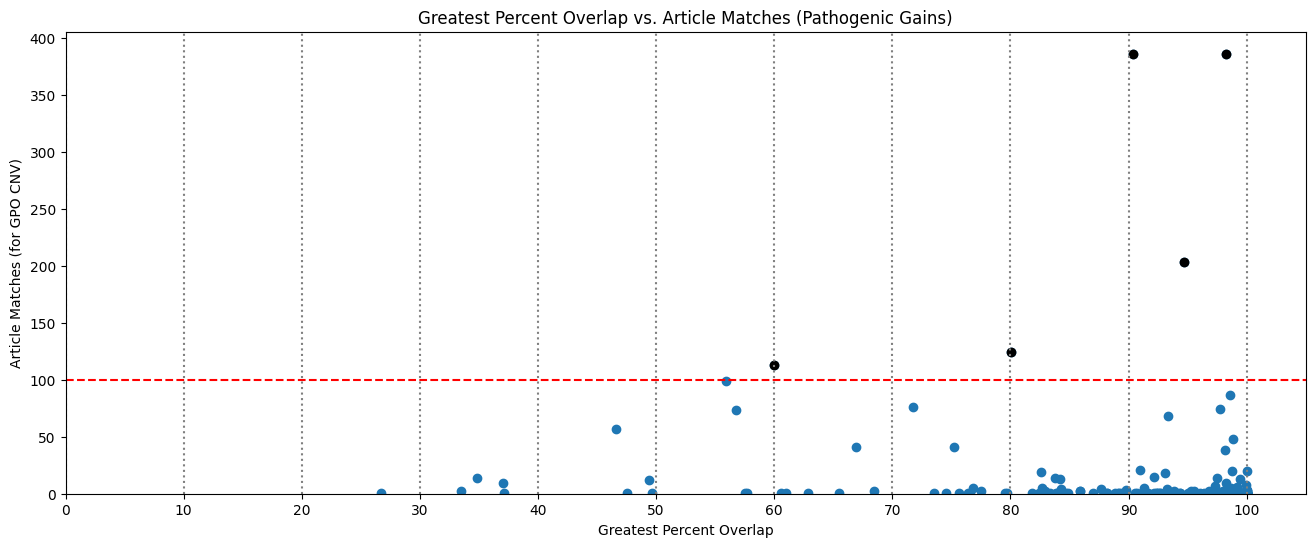

In [ ]:
# We ended up abstracting this into a UDF (user defined function)

import pandas as pd
import matplotlib.pyplot as plt

# Sort the data by the X column in ascending order
data = data.sort_values(by="GPO")

# Extract the columns of interest
x = data["GPO"]
y = data["Article Matches (for GPO CNV)"]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 6)) # Set the figure size to 16x6 inches
ax.scatter(x, y)

# Add a horizontal line at y=100
ax.axhline(y=100, color='r', linestyle='--')

# Color all points above the line in black
ax.scatter(x[y > 100], y[y > 100], color='k')

# Add vertical dotted lines at each interval of 10
for i in range(0, 101, 10):
    ax.axvline(x=i, color='gray', linestyle='dotted')

# Label every 10th percent on the X axis
ax.set_xticks(range(0, 101, 10))

# Add axis labels and a title
ax.set_xlabel("Greatest Percent Overlap")
ax.set_ylabel("Article Matches (for GPO CNV)")
ax.set_title("Greatest Percent Overlap vs. Article Matches (Pathogenic Gains)")

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

# Display the plot
plt.show()


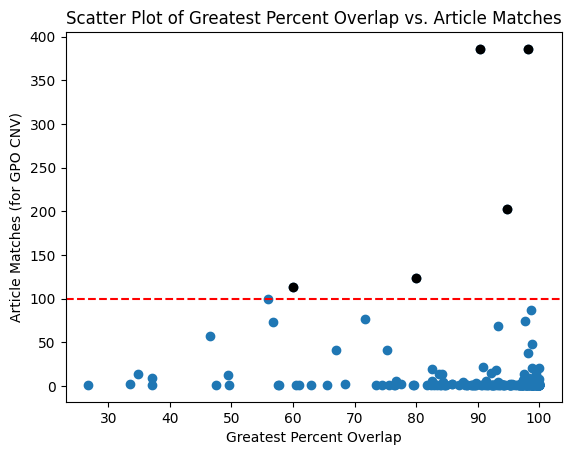

In [ ]:
import matplotlib.pyplot as plt

# Extract the columns of interest
x = data["GPO"]
y = data["Article Matches (for GPO CNV)"]

# Create the scatter plot
plt.scatter(x, y)

# Add a horizontal line at y=100
plt.axhline(y=100, color='r', linestyle='--')

# Color all points above the line in black
plt.scatter(x[y > 100], y[y > 100], color='k')

# Add axis labels and a title
plt.xlabel("Greatest Percent Overlap")
plt.ylabel("Article Matches (for GPO CNV)")
plt.title("Scatter Plot of Greatest Percent Overlap vs. Article Matches")

# Display the plot
plt.show()
